
# 📊 Dashboard 6: Control de Rentabilidad del Negocio

Este análisis tiene como objetivo calcular indicadores clave de rentabilidad del restaurante, incluyendo ventas, costos y márgenes, con base en los datos históricos de los últimos 6 meses. Este análisis alimentará visualizaciones como KPIs financieros y distribución de costos operativos.


In [13]:

import pandas as pd
import matplotlib.pyplot as plt

archivo_excel = "/content/Datos_Restaurante_Ejemplo_6meses.xlsx"
xls = pd.ExcelFile(archivo_excel)

ventas = xls.parse('Ventas')
costos = xls.parse('CostosOperacion')


In [14]:

ventas['fecha'] = pd.to_datetime(ventas['fecha'])
ventas['mes'] = ventas['fecha'].dt.month

ventas_totales = ventas['total'].sum()
ventas_mensuales = ventas.groupby('mes')['total'].sum()
gastos_totales = costos['monto'].sum()
margen_neto = ((ventas_totales - gastos_totales) / ventas_totales) * 100

print(f"Ventas Totales: ${ventas_totales:,.2f}")
print(f"Gastos Totales: ${gastos_totales:,.2f}")
print(f"Margen Neto: {margen_neto:.2f}%")


Ventas Totales: $29,154.45
Gastos Totales: $22,297.03
Margen Neto: 23.52%


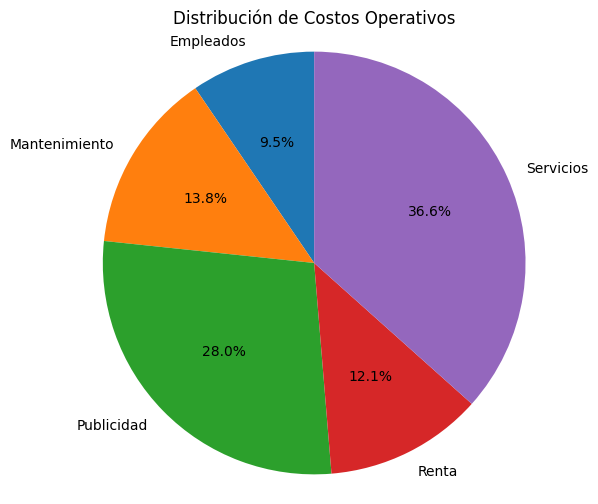

In [15]:
costos_categoria = costos.groupby('tipo_costo')['monto'].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(costos_categoria['monto'], labels=costos_categoria['tipo_costo'], autopct='%1.1f%%', startangle=90)
plt.title("Distribución de Costos Operativos")
plt.axis('equal')
plt.show()


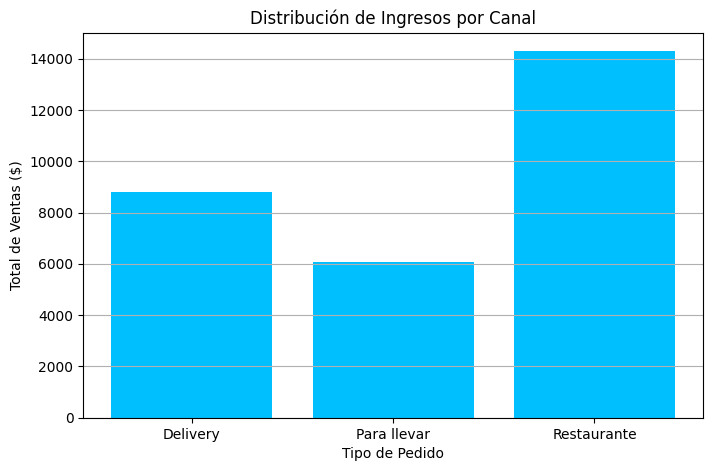

In [17]:
ventas_canal = ventas.groupby('tipo_pedido')['total'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(ventas_canal['tipo_pedido'], ventas_canal['total'], color='deepskyblue')
plt.title('Distribución de Ingresos por Canal')
plt.xlabel('Tipo de Pedido')
plt.ylabel('Total de Ventas ($)')
plt.grid(axis='y')
plt.show()
